Importing library and data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from lightgbm import LGBMRegressor

train = pd.read_csv("https://raw.githubusercontent.com/jennymoskowitz/JCP/master/Competition/Train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/jennymoskowitz/JCP/master/Competition/Test.csv")
riders = pd.read_csv("https://raw.githubusercontent.com/jennymoskowitz/JCP/master/Competition/Riders.csv")


Exploring the training set

In [ ]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [ ]:
train.shape

(21201, 29)

In [ ]:
train.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

Examining the independent variables

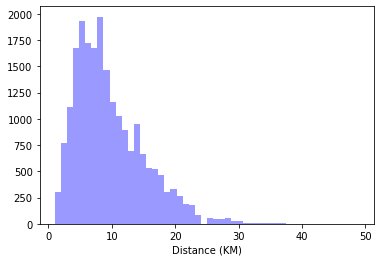

In [ ]:
sns.distplot(train['Distance (KM)'], kde=False, color='b')

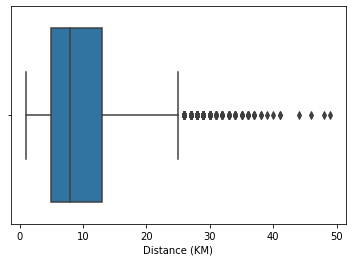

In [ ]:
sns.boxplot(train['Distance (KM)'])

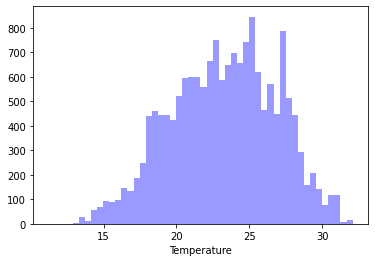

In [ ]:
sns.distplot(train['Temperature'], kde=False, color='b')

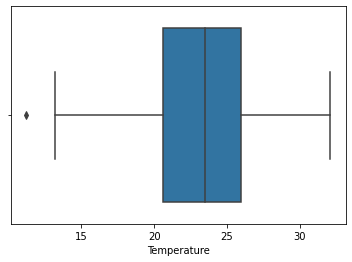

In [ ]:
sns.boxplot(train['Temperature'])

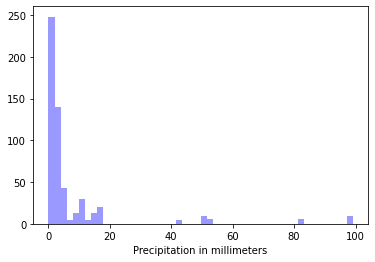

In [ ]:
sns.distplot(train['Precipitation in millimeters'], kde=False, color='b')

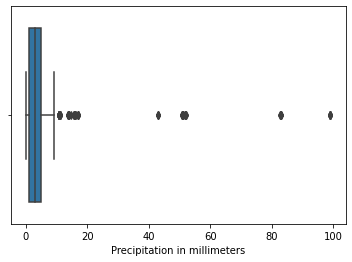

In [ ]:
sns.boxplot(train['Precipitation in millimeters'])

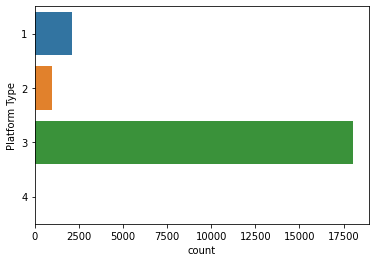

In [ ]:
#types of platforms.
sns.countplot(y = train['Platform Type']);

#3 is mostly used

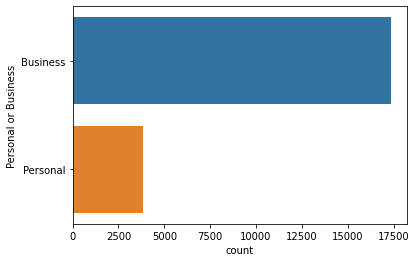

In [ ]:
#comparing personal and business customers
sns.countplot(y = train['Personal or Business']);


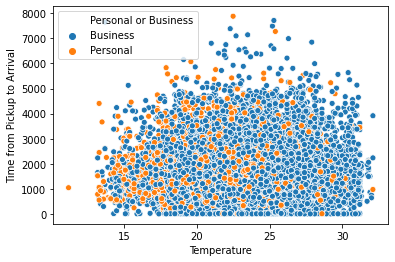

In [ ]:
sns.scatterplot(x="Temperature", y="Time from Pickup to Arrival", data=train, hue = "Personal or Business")

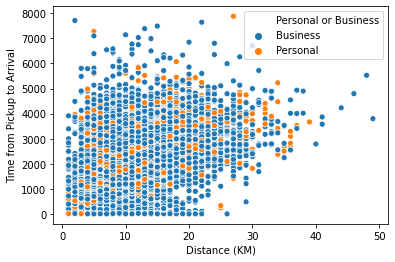

In [ ]:
sns.scatterplot(x="Distance (KM)", y="Time from Pickup to Arrival", data=train, hue = "Personal or Business")

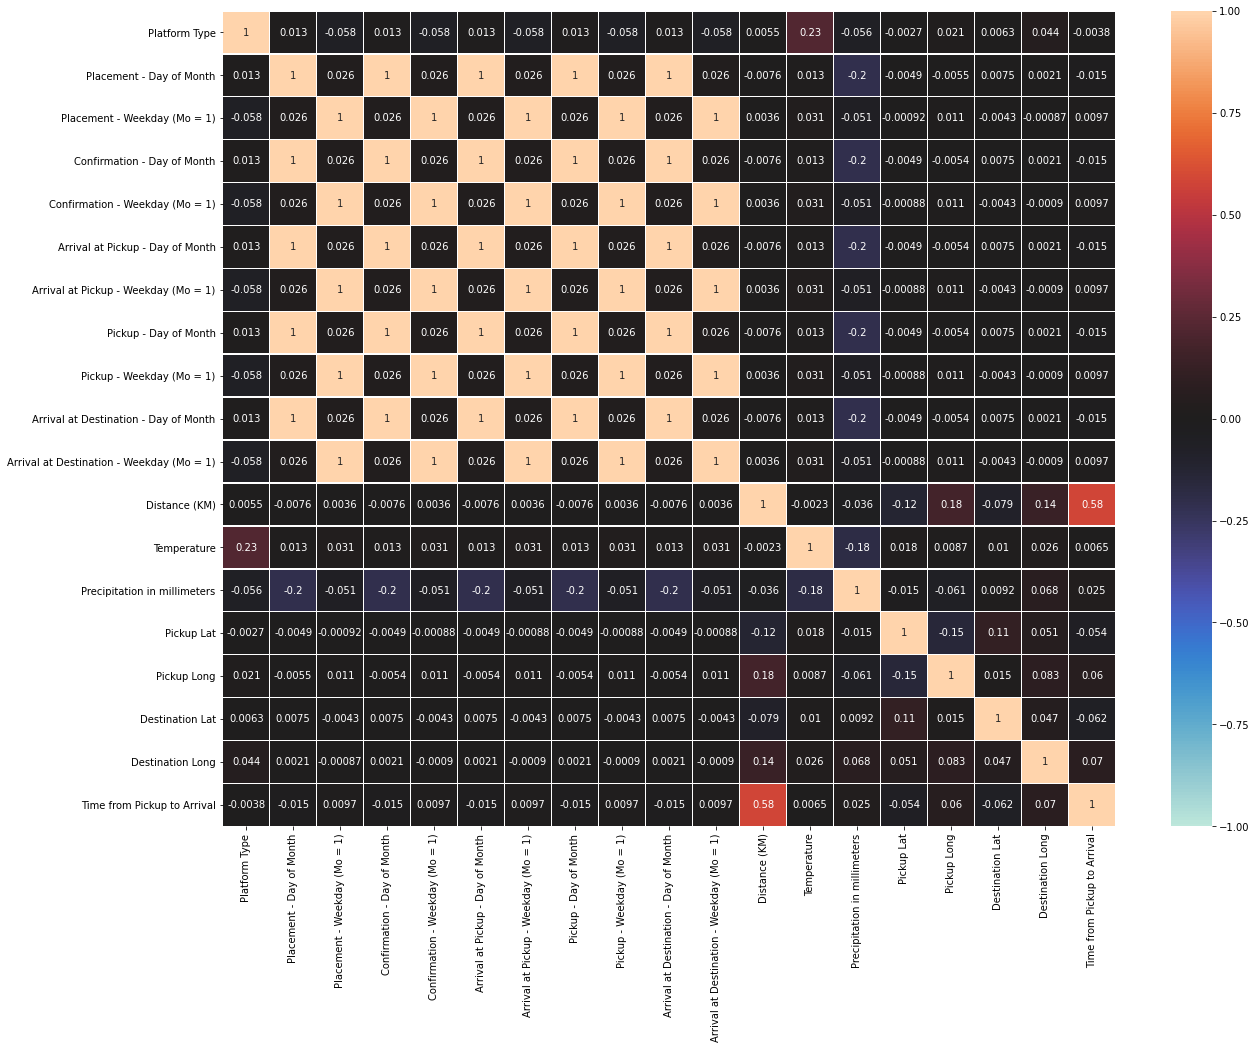

In [ ]:
# seaborn heatmap
corr = train.corr()
fig, ax = plt.subplots(figsize=(20,15)) # 
sns.heatmap(corr, 
            annot=True, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            ax=ax, 
            linewidths=.5, 
            vmin = -1, vmax=1, center=0
           )

Choosing independent variables/narrowing down the columns

In [ ]:
train['Vehicle Type'].unique()

array(['Bike'], dtype=object)

In [ ]:
# Dropped vehicle type because they were only bike
train = train.drop(['Vehicle Type'], axis=1)
train.shape

(21201, 28)

In [ ]:
X_train = train[['Distance (KM)', 'Temperature', 'Precipitation in millimeters']]
X_train.shape

(21201, 3)

In [ ]:
X_train.head()

,Distance (KM),Temperature,Precipitation in millimeters
0,4,20.4,NaN
1,16,26.4,NaN
2,3,NaN,NaN
3,9,19.2,NaN
4,9,15.4,NaN


Filling in NaN values

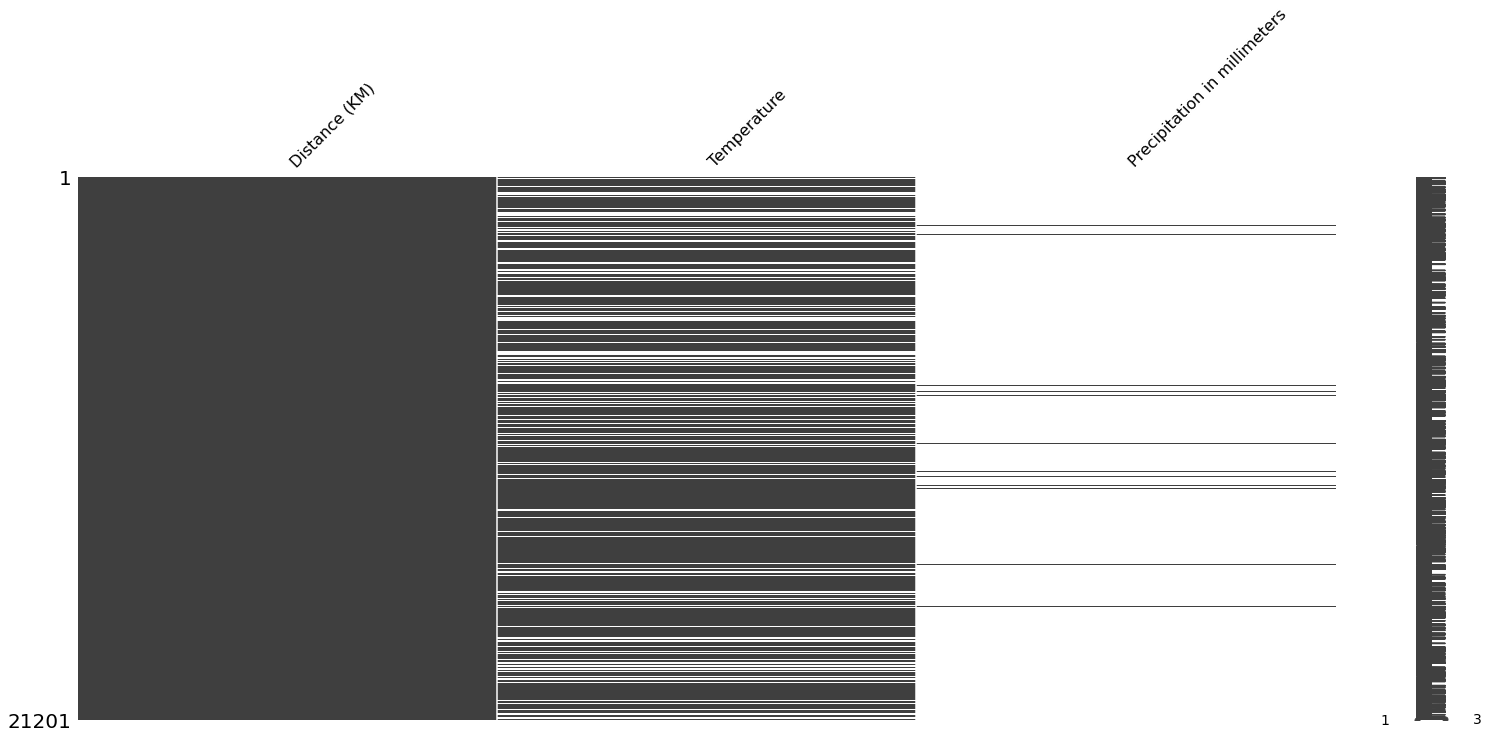

In [ ]:
import missingno as msno

msno.matrix(X_train);

In [ ]:
X_train.isna().sum()

Distance (KM)                       0
Temperature                      4366
Precipitation in millimeters    20649
dtype: int64

In [ ]:
X_train['Precipitation in millimeters'] = X_train['Precipitation in millimeters'].fillna(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_train = X_train.fillna(X_train.mean())

In [ ]:
X_train.head()

,Distance (KM),Temperature,Precipitation in millimeters
0,4,20.400000,0.0
1,16,26.400000,0.0
2,3,23.258889,0.0
3,9,19.200000,0.0
4,9,15.400000,0.0


In [ ]:
X_train.isna().sum()

Distance (KM)                   0
Temperature                     0
Precipitation in millimeters    0
dtype: int64

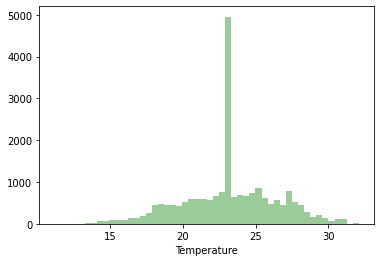

In [ ]:
sns.distplot(X_train['Temperature'], kde=False, color='g')

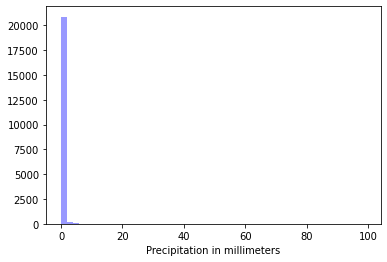

In [ ]:
sns.distplot(X_train['Precipitation in millimeters'], kde=False, color='b')

Cleaning up the testing set in the same manner

In [ ]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [ ]:
X_test = test[['Distance (KM)', 'Temperature', 'Precipitation in millimeters']]
X_test.shape

(7068, 3)

In [ ]:
X_test.isna().sum()

Distance (KM)                      0
Temperature                     1437
Precipitation in millimeters    6869
dtype: int64

In [ ]:
X_test['Precipitation in millimeters'] = X_test['Precipitation in millimeters'].fillna(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_test = X_test.fillna(X_test.mean())

In [ ]:
X_test.isna().sum()

Distance (KM)                   0
Temperature                     0
Precipitation in millimeters    0
dtype: int64

In [ ]:
X_test.head()

,Distance (KM),Temperature,Precipitation in millimeters
0,8,23.24612,0.0
1,5,23.24612,0.0
2,5,22.80000,0.0
3,5,24.50000,0.0
4,6,24.40000,0.0


Finalizing the test/train split

In [ ]:
y_train = train[['Time from Pickup to Arrival']]

In [ ]:
print('X train:', X_train.shape)
print('y train:', y_train.shape)
print('X test:', X_test.shape)
# no y_test

X train: (21201, 3)
y train: (21201, 1)
X test: (7068, 3)


Creating a linear regression model and fitting it to the training set

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: [539.16617814]
Coefficients: [[101.12014386   2.40571388   2.4221849 ]]


Predicting delivery time using the test set

In [ ]:
predictions = model.predict(X_test) 
predictions

array([[1404.0508419 ],
       [1100.69041031],
       [1099.61717397],
       ...,
       [1610.75103521],
       [2416.1036153 ],
       [1401.77474862]])

In [ ]:
X = X_test.reset_index().copy() # make a copy of indices and data
X['Predicted Travel Time'] = predictions
X.head()

,index,Distance (KM),Temperature,Precipitation in millimeters,Predicted Travel Time
0,0,8,23.24612,0.0,1404.050842
1,1,5,23.24612,0.0,1100.690410
2,2,5,22.80000,0.0,1099.617174
3,3,5,24.50000,0.0,1103.706888
4,4,6,24.40000,0.0,1204.586460


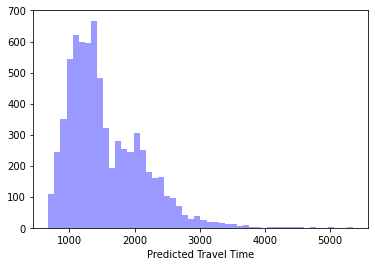

In [ ]:
sns.distplot(X['Predicted Travel Time'], kde=False, color='b')

In [ ]:
np.mean(X['Predicted Travel Time'])

1552.0357272540064

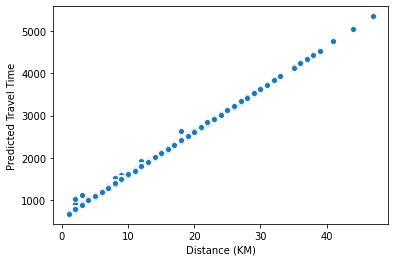

In [ ]:
sns.scatterplot(x=X['Distance (KM)'], y=X['Predicted Travel Time'])

In [ ]:
cat_cols = ['Order No', 'User Id', 'Personal or Business', 'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time',
'Pickup - Time', 'Arrival at Destination - Time', 'Rider Id']
encoded_cat = pd.get_dummies(train[cat_cols])

In [ ]:
num_cols = ['Platform Type', 'Placement - Day of Month', 'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long',
       'Time from Pickup to Arrival']

In [ ]:
orders = pd.concat([
                            train[num_cols],
                            encoded_cat
                        ], axis=1
)
orders.head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,Order No_Order_No_1,Order No_Order_No_10,Order No_Order_No_100,Order No_Order_No_1000,Order No_Order_No_10000,Order No_Order_No_10002,Order No_Order_No_10004,Order No_Order_No_10005,Order No_Order_No_10006,Order No_Order_No_10007,Order No_Order_No_10008,Order No_Order_No_10009,Order No_Order_No_1001,Order No_Order_No_10011,Order No_Order_No_10013,Order No_Order_No_10014,Order No_Order_No_10016,Order No_Order_No_10019,Order No_Order_No_1002,Order No_Order_No_10020,Order No_Order_No_10021,...,Rider Id_Rider_Id_925,Rider Id_Rider_Id_926,Rider Id_Rider_Id_927,Rider Id_Rider_Id_928,Rider Id_Rider_Id_929,Rider Id_Rider_Id_93,Rider Id_Rider_Id_930,Rider Id_Rider_Id_931,Rider Id_Rider_Id_932,Rider Id_Rider_Id_933,Rider Id_Rider_Id_934,Rider Id_Rider_Id_935,Rider Id_Rider_Id_936,Rider Id_Rider_Id_937,Rider Id_Rider_Id_938,Rider Id_Rider_Id_939,Rider Id_Rider_Id_94,Rider Id_Rider_Id_940,Rider Id_Rider_Id_941,Rider Id_Rider_Id_942,Rider Id_Rider_Id_943,Rider Id_Rider_Id_944,Rider Id_Rider_Id_946,Rider Id_Rider_Id_947,Rider Id_Rider_Id_948,Rider Id_Rider_Id_949,Rider Id_Rider_Id_95,Rider Id_Rider_Id_950,Rider Id_Rider_Id_951,Rider Id_Rider_Id_952,Rider Id_Rider_Id_953,Rider Id_Rider_Id_954,Rider Id_Rider_Id_955,Rider Id_Rider_Id_956,Rider Id_Rider_Id_958,Rider Id_Rider_Id_959,Rider Id_Rider_Id_96,Rider Id_Rider_Id_97,Rider Id_Rider_Id_98,Rider Id_Rider_Id_99
0,3,9,5,9,5,9,5,9,5,9,5,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,12,5,12,5,12,5,12,5,12,5,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,1993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,30,2,30,2,30,2,30,2,30,2,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,15,5,15,5,15,5,15,5,15,5,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,1341,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,13,1,13,1,13,1,13,1,13,1,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,1214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#concat riders columns to train columns
train_riders = pd.concat([train,riders], axis = 1)
train_riders

,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,Rider_Id_396,2946.0,2298.0,14.0,1159.0
1,Order_No_25375,User_Id_2285,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,Rider_Id_479,360.0,951.0,13.5,176.0
2,Order_No_1899,User_Id_265,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,Rider_Id_648,1746.0,821.0,14.3,466.0
3,Order_No_9336,User_Id_1402,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,Rider_Id_753,314.0,980.0,12.5,75.0
4,Order_No_27883,User_Id_1737,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,Rider_Id_335,536.0,1113.0,13.7,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,3,Personal,20,3,3:54:38 PM,20,3,3:55:09 PM,20,3,3:58:49 PM,20,3,4:20:08 PM,20,3,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9,NaN,NaN,NaN,NaN,NaN
21197,Order_No_22892,User_Id_1796,3,Business,13,6,10:13:34 AM,13,6,10:13:41 AM,13,6,10:20:04 AM,13,6,10:33:27 AM,13,6,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770,NaN,NaN,NaN,NaN,NaN
21198,Order_No_2831,User_Id_2956,3,Business,7,4,5:06:16 PM,7,4,5:07:09 PM,7,4,5:30:17 PM,7,4,5:50:52 PM,7,4,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953,NaN,NaN,NaN,NaN,NaN
21199,Order_No_6174,User_Id_2524,1,Personal,4,3,9:31:39 AM,4,3,9:31:53 AM,4,3,9:38:59 AM,4,3,9:45:15 AM,4,3,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380,NaN,NaN,NaN,NaN,NaN


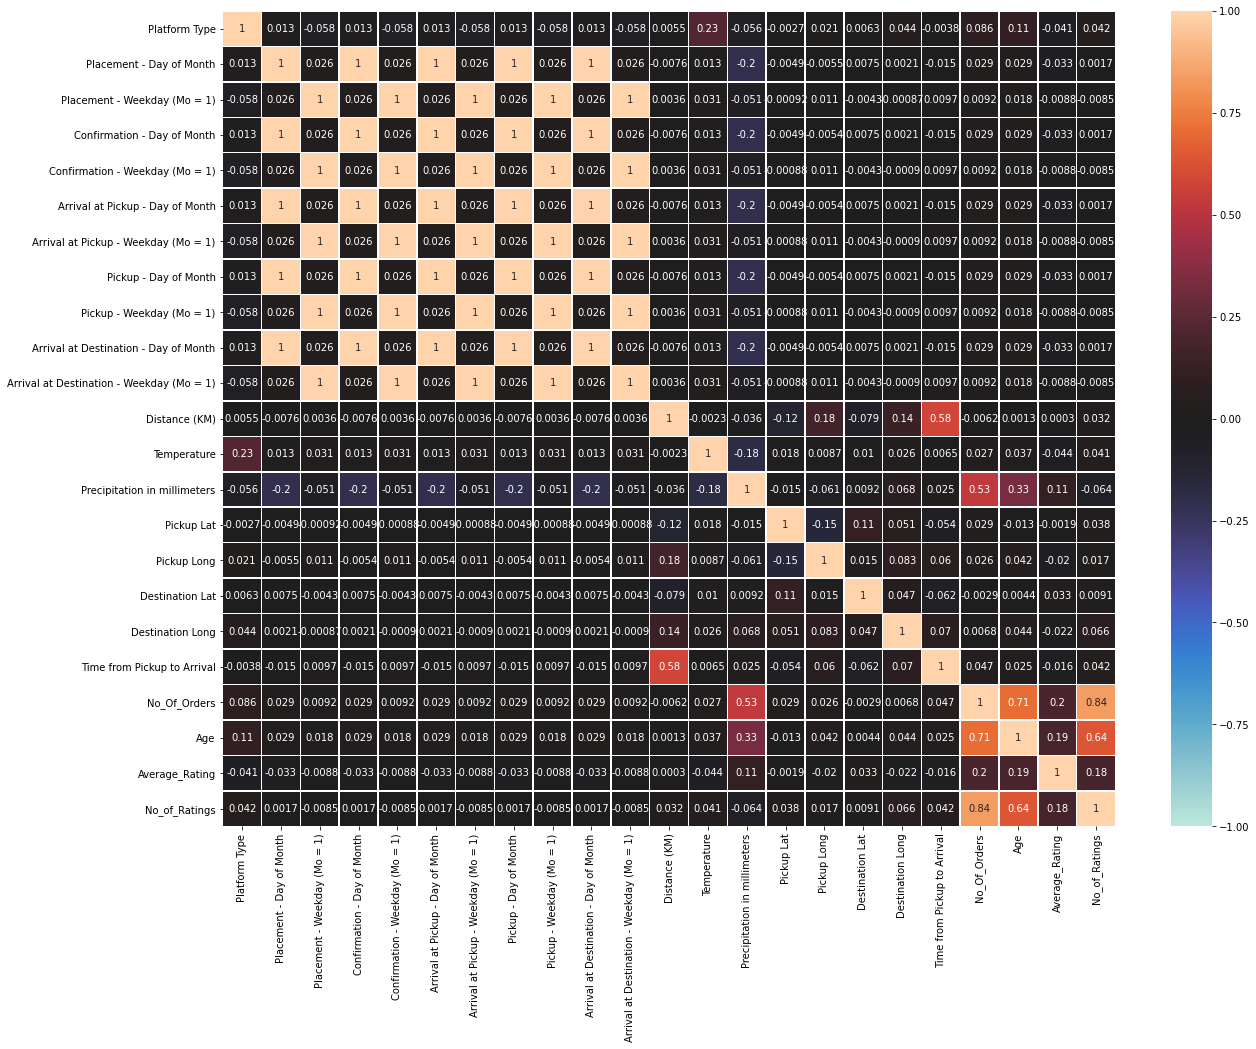

In [ ]:
# seaborn heatmap relationship between train_riders columns
corr = train_riders.corr()
fig, ax = plt.subplots(figsize=(20,15)) # 
sns.heatmap(corr, 
            annot=True, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            ax=ax, 
            linewidths=.5, 
            vmin = -1, vmax=1, center=0
           )

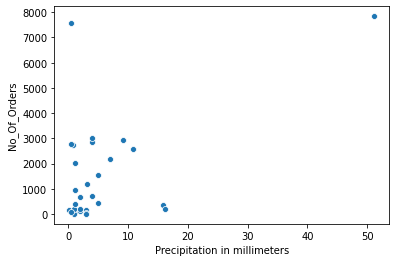

In [ ]:
#correlation between No. of orders and Precipitation
#very few values of precipitation exist
sns.scatterplot(x=train_riders['Precipitation in millimeters'], y=train_riders['No_Of_Orders'], data = train_riders)

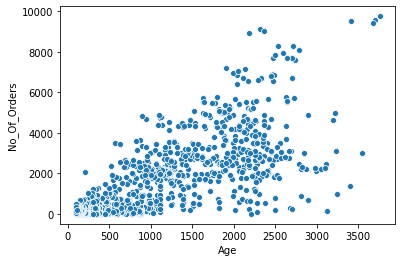

In [ ]:
#relationship between Age(no. of days since rider delivered first order) and No. of orders
sns.scatterplot(x=train_riders['Age'], y=train_riders['No_Of_Orders'], data = train_riders)

Isolate day of week- Placement of Order

In [ ]:
day_of_week = pd.get_dummies(train_riders['Placement - Weekday (Mo = 1)'])

In [ ]:
day_of_week = day_of_week.rename(columns = {1 : 'Mon', 2 : 'Tue', 3 : 'Wed', 4 : 'Thur', 5 : 'Fri', 6 : 'Sat', 7 : 'Sun'})

In [ ]:
day_of_week

,Mon,Tue,Wed,Thur,Fri,Sat,Sun
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
21196,0,0,1,0,0,0,0
21197,0,0,0,0,0,1,0
21198,0,0,0,1,0,0,0
21199,0,0,1,0,0,0,0


In [ ]:
train_riders = pd.concat((train_riders, day_of_week), axis = 1)

In [ ]:
train_riders

,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Mon,Tue,Wed,Thur,Fri,Sat,Sun
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,Rider_Id_396,2946.0,2298.0,14.0,1159.0,0,0,0,0,1,0,0
1,Order_No_25375,User_Id_2285,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,Rider_Id_479,360.0,951.0,13.5,176.0,0,0,0,0,1,0,0
2,Order_No_1899,User_Id_265,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,Rider_Id_648,1746.0,821.0,14.3,466.0,0,1,0,0,0,0,0
3,Order_No_9336,User_Id_1402,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,Rider_Id_753,314.0,980.0,12.5,75.0,0,0,0,0,1,0,0
4,Order_No_27883,User_Id_1737,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,Rider_Id_335,536.0,1113.0,13.7,156.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,3,Personal,20,3,3:54:38 PM,20,3,3:55:09 PM,20,3,3:58:49 PM,20,3,4:20:08 PM,20,3,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0
21197,Order_No_22892,User_Id_1796,3,Business,13,6,10:13:34 AM,13,6,10:13:41 AM,13,6,10:20:04 AM,13,6,10:33:27 AM,13,6,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0
21198,Order_No_2831,User_Id_2956,3,Business,7,4,5:06:16 PM,7,4,5:07:09 PM,7,4,5:30:17 PM,7,4,5:50:52 PM,7,4,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0
21199,Order_No_6174,User_Id_2524,1,Personal,4,3,9:31:39 AM,4,3,9:31:53 AM,4,3,9:38:59 AM,4,3,9:45:15 AM,4,3,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0


In [ ]:
train_riders['Sat'].dtype

dtype('uint8')

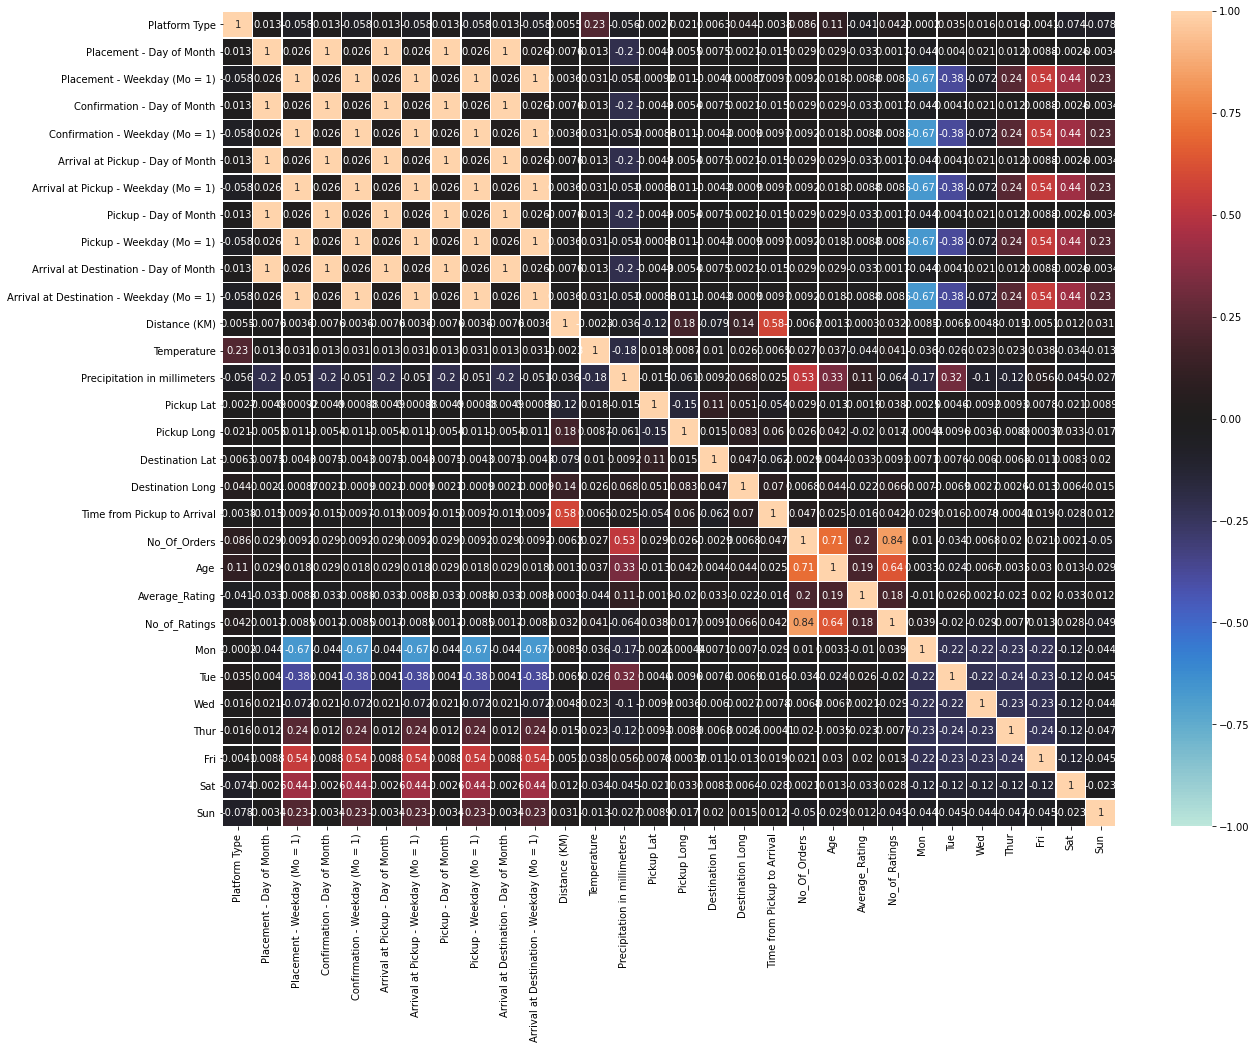

In [ ]:
# seaborn heatmap
corr = train_riders.corr()
fig, ax = plt.subplots(figsize=(20,15)) # 
sns.heatmap(corr, 
            annot=True, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            ax=ax, 
            linewidths=.5, 
            vmin = -1, vmax=1, center=0
           )